In [1]:
import importlib
from new_genes import NewGenes
import pandas as pd
import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Playground for NewGenes Library

taking a look at yakult

In [2]:
# init
# input needs to be reference sequence
# keep in mind that this downloads directly the annotated (coding) genes
yakult = NewGenes('ASM82905v1')

found 1 ids
ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/829/055/GCF_000829055.1_ASM82905v1/GCF_000829055.1_ASM82905v1_cds_from_genomic.fna.gz


In [14]:
# prints out the total annotated genes
len(yakult)

2805

In [13]:
print(yakult.complete_sequence)

ATGCCCAATTTAGAGGAGCTTTGGGCTTACCTGAATGATAAATTCCGTGAAGAGTTGACCCCAGTCGGCTACAGCACATGGATTCAAACAGCCAAACCCGTTAAATTGACCAAAGATAAACTCGAAATCGAAGTCCCGGCATCGTTGCATAAGGCTTACTGGGAGAAAAATCTGGTCACCAAAGTCGTGGAAGGGGTCTATGAATTTGCCCAGCTGGAAGTCGATCCGGTGATCATGACCAAAGACGAGTTACAGCCGGTCACGACGCACCAGCAACCAGCGACTGCCGATGATGATGATCAACAACTAACTTTTAAGGCGAAAACGCATCTCAATCCGAAATACACGTTTGACCGGTTCGTGATCGGCAAAGGCAACCAAATGGCGCATGCCGCGACGTTAGCGGTTGCCGAAGCTCCCGGCACGACGTATAATCCGCTGTTTATTTATGGTGGCGTCGGTTTGGGCAAGACGCACTTGATGCAGGCTATCGGTAACCTGGTTTTGGAAAATAATCCAGCCGCTAACATTAAATATGTCACCAGCGAGAATTTTGCCAACGACTTCATTAACTCGATTCAAACCAAGCAGCAGGAGCAATTTCGTCAGGAGTATCGCAATGTTGACCTGCTGTTGGTTGATGATATCCAGTTTTTTGGTGACAAAGAAGCCACGCAGGAAGAATTCTTCCATACGTTTAACACGCTGTACGAAAATATGAAGCAGATCGTACTCACAAGCGATCGCCTGCCAAACGAAATTCCTAAGCTGCAGGAGCGGCTGGTGTCGCGGTTTAACAAAGGCTTGTCCGTTGACGTGACGCCGCCTGATCTCGAAACCCGCATTGCCATCTTGCGCAATAAAGCCGATGCCGAAGATCTCAGCATTCCTGATGACACGCTTTCTTACATTGCCGGCCAAATTGAAAGTAACGTGCGTGATTTGGAAGGGGCTTTGGTGCGTGTCCAGGCTTTTTCTACTATGAAAAATGAAGATATCA

In [15]:
# list all the genes
yakult.list_genes()

LBCZ_RS00005
LBCZ_RS00010
LBCZ_RS00015
LBCZ_RS00020
LBCZ_RS00025
LBCZ_RS00030
LBCZ_RS00035
LBCZ_RS00040
LBCZ_RS00045
LBCZ_RS00050
LBCZ_RS00055
LBCZ_RS00060
LBCZ_RS00065
LBCZ_RS00070
LBCZ_RS00075
LBCZ_RS00080
LBCZ_RS00085
LBCZ_RS00090
LBCZ_RS00095
LBCZ_RS00100
LBCZ_RS00110
LBCZ_RS00115
LBCZ_RS00120
LBCZ_RS00125
LBCZ_RS00130
LBCZ_RS00135
LBCZ_RS00140
LBCZ_RS00145
LBCZ_RS00150
LBCZ_RS00155
LBCZ_RS00160
LBCZ_RS00165
LBCZ_RS00170
LBCZ_RS00175
LBCZ_RS00180
LBCZ_RS00185
LBCZ_RS00190
LBCZ_RS00195
LBCZ_RS00200
LBCZ_RS00205
LBCZ_RS00210
LBCZ_RS00215
LBCZ_RS00220
LBCZ_RS00225
LBCZ_RS00230
LBCZ_RS00240
LBCZ_RS00245
LBCZ_RS00250
LBCZ_RS00255
LBCZ_RS00260
LBCZ_RS00265
LBCZ_RS00270
LBCZ_RS00275
LBCZ_RS00280
LBCZ_RS00285
LBCZ_RS00290
LBCZ_RS00295
LBCZ_RS00300
LBCZ_RS00305
LBCZ_RS00310
LBCZ_RS00315
LBCZ_RS00320
LBCZ_RS15910
LBCZ_RS00325
LBCZ_RS16520
LBCZ_RS00330
LBCZ_RS00335
LBCZ_RS00340
LBCZ_RS00345
LBCZ_RS16245
LBCZ_RS00355
LBCZ_RS16250
LBCZ_RS16255
LBCZ_RS00365
LBCZ_RS00370
LBCZ_RS00375
LBCZ_RS00380

## Genome properties/data rep

In [3]:
yakult.print_genome_summary()

Mean GC Content-> T:47.99780371380697, 1:54.43022578518216, 2:38.120079456762745, 3:51.4432288224944
Std GC content-> T:3.9333303002550197, 1:5.59620581567793, 2:5.1420556965271995, 3:7.1901061819491865
Relative nucleotide frequency: {'G': 0.25390022015214475, 'A': 0.26340302506088364, 'C': 0.2329938908275224, 'T': 0.2497028639594492}
Nucleotide Identity: {'A': [0.2553701468935958, 0.2571262119761974, 0.2777127163128578], 'T': [0.26331821397361743, 0.2391815333765315, 0.2466088445281987], 'G': [0.24067365367352883, 0.27363940624312644, 0.24738760053977898], 'C': [0.240637985459258, 0.23005284840414464, 0.22829083861916452]}
Dinucleotide Identity: {'AA': [0.08006800739520976, 0.08457528073856982, 0.08832173718677326], 'AG': [0.055446239084040255, 0.04828525059892876, 0.05131829876682947], 'AT': [0.06612173561530642, 0.06895022500698503, 0.07916569569745709], 'AC': [0.053734164799039336, 0.0553154556317138, 0.05890612590419031], 'TA': [0.04349738730330466, 0.04250224412514787, 0.03745404

In [6]:
print(yakult.mean_GCT)
print(yakult.mean_GC1)
print(yakult.mean_GC2)
print(yakult.mean_GC3)
print(yakult.std_GCT)
print(yakult.std_GC1)
print(yakult.std_GC2)
print(yakult.std_GC3)

47.99780371380697
54.43022578518216
38.120079456762745
51.4432288224944
3.9333303002550197
5.59620581567793
5.1420556965271995
7.1901061819491865


In [7]:
print(yakult.rel_freq)
print(yakult.nucleutide_identity)
print(yakult.dinucleutide_identity)
print(yakult.cub)

{'G': 0.25390022015214475, 'A': 0.26340302506088364, 'C': 0.2329938908275224, 'T': 0.2497028639594492}
{'A': [0.2553701468935958, 0.2571262119761974, 0.2777127163128578], 'T': [0.26331821397361743, 0.2391815333765315, 0.2466088445281987], 'G': [0.24067365367352883, 0.27363940624312644, 0.24738760053977898], 'C': [0.240637985459258, 0.23005284840414464, 0.22829083861916452]}
{'AA': [0.08006800739520976, 0.08457528073856982, 0.08832173718677326], 'AG': [0.055446239084040255, 0.04828525059892876, 0.05131829876682947], 'AT': [0.06612173561530642, 0.06895022500698503, 0.07916569569745709], 'AC': [0.053734164799039336, 0.0553154556317138, 0.05890612590419031], 'TA': [0.04349738730330466, 0.04250224412514787, 0.037454047395979476], 'TG': [0.08495455275031656, 0.06909051998311705, 0.06969934037503983], 'TT': [0.07885172128857369, 0.07794337076514264, 0.0850497691074851], 'TC': [0.05601455263142251, 0.04964539850312394, 0.054405980853279814], 'GA': [0.060298305165351895, 0.07731204337254856, 0.

## Gene properties/data rep

In [5]:
yakult.print_gene_summary('LBCZ_RS00005')

Mean GC Content-> T: 48.44444444444444, 1:56.44444444444444, 2:32.22222222222222, 3:56.666666666666664
Std GC content-> T:0.11355281569120143, 1:0.3599257649923083, 2:-1.1469843157326693, 3:0.7264757587705374
Relative nucleotide frequency: {'G': 0.24592592592592594, 'A': 0.2903703703703704, 'C': 0.23851851851851852, 'T': 0.22518518518518518}
Nucleotide Identity: {'A': [0.3111111111111111, 0.3844444444444444, 0.17555555555555555], 'T': [0.12444444444444444, 0.29333333333333333, 0.2577777777777778], 'G': [0.3377777777777778, 0.10666666666666667, 0.29333333333333333], 'C': [0.22666666666666666, 0.21555555555555556, 0.2733333333333333]}
Dinucleotide Identity: {'AA': [0.13111111111111112, 0.13111111111111112, 0.060133630289532294], 'AG': [0.017777777777777778, 0.08, 0.0645879732739421], 'AT': [0.08444444444444445, 0.1111111111111111, 0.022271714922048998], 'AC': [0.07777777777777778, 0.06222222222222222, 0.026726057906458798], 'TA': [0.028888888888888888, 0.017777777777777778, 0.07126948775

In [9]:
print(yakult['LBCZ_RS00005']['GCT'])
print(yakult['LBCZ_RS00005']['GC1'])
print(yakult['LBCZ_RS00005']['GC2'])
print(yakult['LBCZ_RS00005']['GC3'])
print(yakult['LBCZ_RS00005']['SDT'])
print(yakult['LBCZ_RS00005']['SD1'])
print(yakult['LBCZ_RS00005']['SD2'])
print(yakult['LBCZ_RS00005']['SD3'])

48.44444444444444
56.44444444444444
32.22222222222222
56.666666666666664
0.11355281569120143
0.3599257649923083
-1.1469843157326693
0.7264757587705374


In [10]:
print(yakult['LBCZ_RS00005']['rel_freq'])
print(yakult['LBCZ_RS00005']['12_symbols'])
print(yakult['LBCZ_RS00005']['48_symbols'])
print(yakult['LBCZ_RS00005']['cub'])

{'G': 0.24592592592592594, 'A': 0.2903703703703704, 'C': 0.23851851851851852, 'T': 0.22518518518518518}
{'A': [0.3111111111111111, 0.3844444444444444, 0.17555555555555555], 'T': [0.12444444444444444, 0.29333333333333333, 0.2577777777777778], 'G': [0.3377777777777778, 0.10666666666666667, 0.29333333333333333], 'C': [0.22666666666666666, 0.21555555555555556, 0.2733333333333333]}
{'AA': [0.13111111111111112, 0.13111111111111112, 0.060133630289532294], 'AG': [0.017777777777777778, 0.08, 0.0645879732739421], 'AT': [0.08444444444444445, 0.1111111111111111, 0.022271714922048998], 'AC': [0.07777777777777778, 0.06222222222222222, 0.026726057906458798], 'TA': [0.028888888888888888, 0.017777777777777778, 0.07126948775055679], 'TG': [0.006666666666666667, 0.10444444444444445, 0.08685968819599109], 'TT': [0.07333333333333333, 0.08444444444444445, 0.0400890868596882], 'TC': [0.015555555555555555, 0.08666666666666667, 0.060133630289532294], 'GA': [0.14, 0.006666666666666667, 0.0757238307349666], 'GG'

## Agglomerative clustering using JS divergences (SKLEARN) just dont use sklearn man

possible but need to check the threshold.... this concerns the linkage.. can't seem to understand the paper

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(30,10))
    dendrogram(linkage_matrix, **kwargs)

### relative frequency

there is actually no relative freq.. only nucleotide id, dinucleotide and cub so this part is a waste

In [4]:
def calculate_JS_relative_freq(gene_1, gene_2, genome):
    # calculate H(s1):
    freq_1 = genome[gene_1]['rel_freq']
    freq_2 = genome[gene_2]['rel_freq']
    sigma_HS1 = 0
    sigma_HS2 = 0
    sigma_HS12 = 0
    length_L1L2 = len(genome[gene_1]['sequence'])+len(genome[gene_2]['sequence'])
    for nt in ["A", "T", "G", "C"]:
        sigma_HS1 += freq_1[nt]*math.log(freq_1[nt],2)
        sigma_HS2 += freq_2[nt]*math.log(freq_2[nt],2)
        sigma_HS12 += ((((len(genome[gene_1]['sequence'])/length_L1L2)*freq_1[nt])+((len(genome[gene_2]['sequence'])/length_L1L2)*freq_2[nt])))*math.log(((((len(genome[gene_1]['sequence'])/length_L1L2)*freq_1[nt])+((len(genome[gene_2]['sequence'])/length_L1L2)*freq_2[nt]))),2)
        
    sigma_HS1= -1 *sigma_HS1
    sigma_HS2= -1 *sigma_HS2
    sigma_HS12 = -1 * sigma_HS12
    JS_div = sigma_HS12 - ((len(genome[gene_1]['sequence'])/length_L1L2)*sigma_HS1) - ((len(genome[gene_2]['sequence'])/length_L1L2)*sigma_HS2)
    # print(sigma_HS1)
    # print(sigma_HS2)
    # print(sigma_HS12)
    # print(JS_div)
    return JS_div

Using sklearn for the agglomerative clustering. 

SKlearn allows us to use custom 'distance' with the precomputed flag for affinity...

however we must fit the a square matrix i.e. the distances between each genes

In [5]:
divergences = np.zeros((len(yakult), len(yakult)))
for x, gene_1 in enumerate(yakult.genes):
    for y, gene_2 in enumerate(yakult.genes):
        divergences[x,y] = calculate_JS_relative_freq(gene_1,gene_2,yakult)

In [6]:
divergences

array([[0.        , 0.00119878, 0.00101084, ..., 0.00281623, 0.00039302,
        0.0024073 ],
       [0.00119878, 0.        , 0.0019752 , ..., 0.00586947, 0.00011213,
        0.00136599],
       [0.00101084, 0.0019752 , 0.        , ..., 0.00994003, 0.0029826 ,
        0.0051125 ],
       ...,
       [0.00281623, 0.00586947, 0.00994003, ..., 0.        , 0.00727319,
        0.00826199],
       [0.00039302, 0.00011213, 0.0029826 , ..., 0.00727319, 0.        ,
        0.00177343],
       [0.0024073 , 0.00136599, 0.0051125 , ..., 0.00826199, 0.00177343,
        0.        ]])

In [7]:
agg = AgglomerativeClustering(n_clusters=None,distance_threshold=0.25, metric='precomputed', linkage='complete')

In [8]:
agg.fit(divergences)

AgglomerativeClustering(distance_threshold=0.25, linkage='complete',
                        metric='precomputed', n_clusters=None)

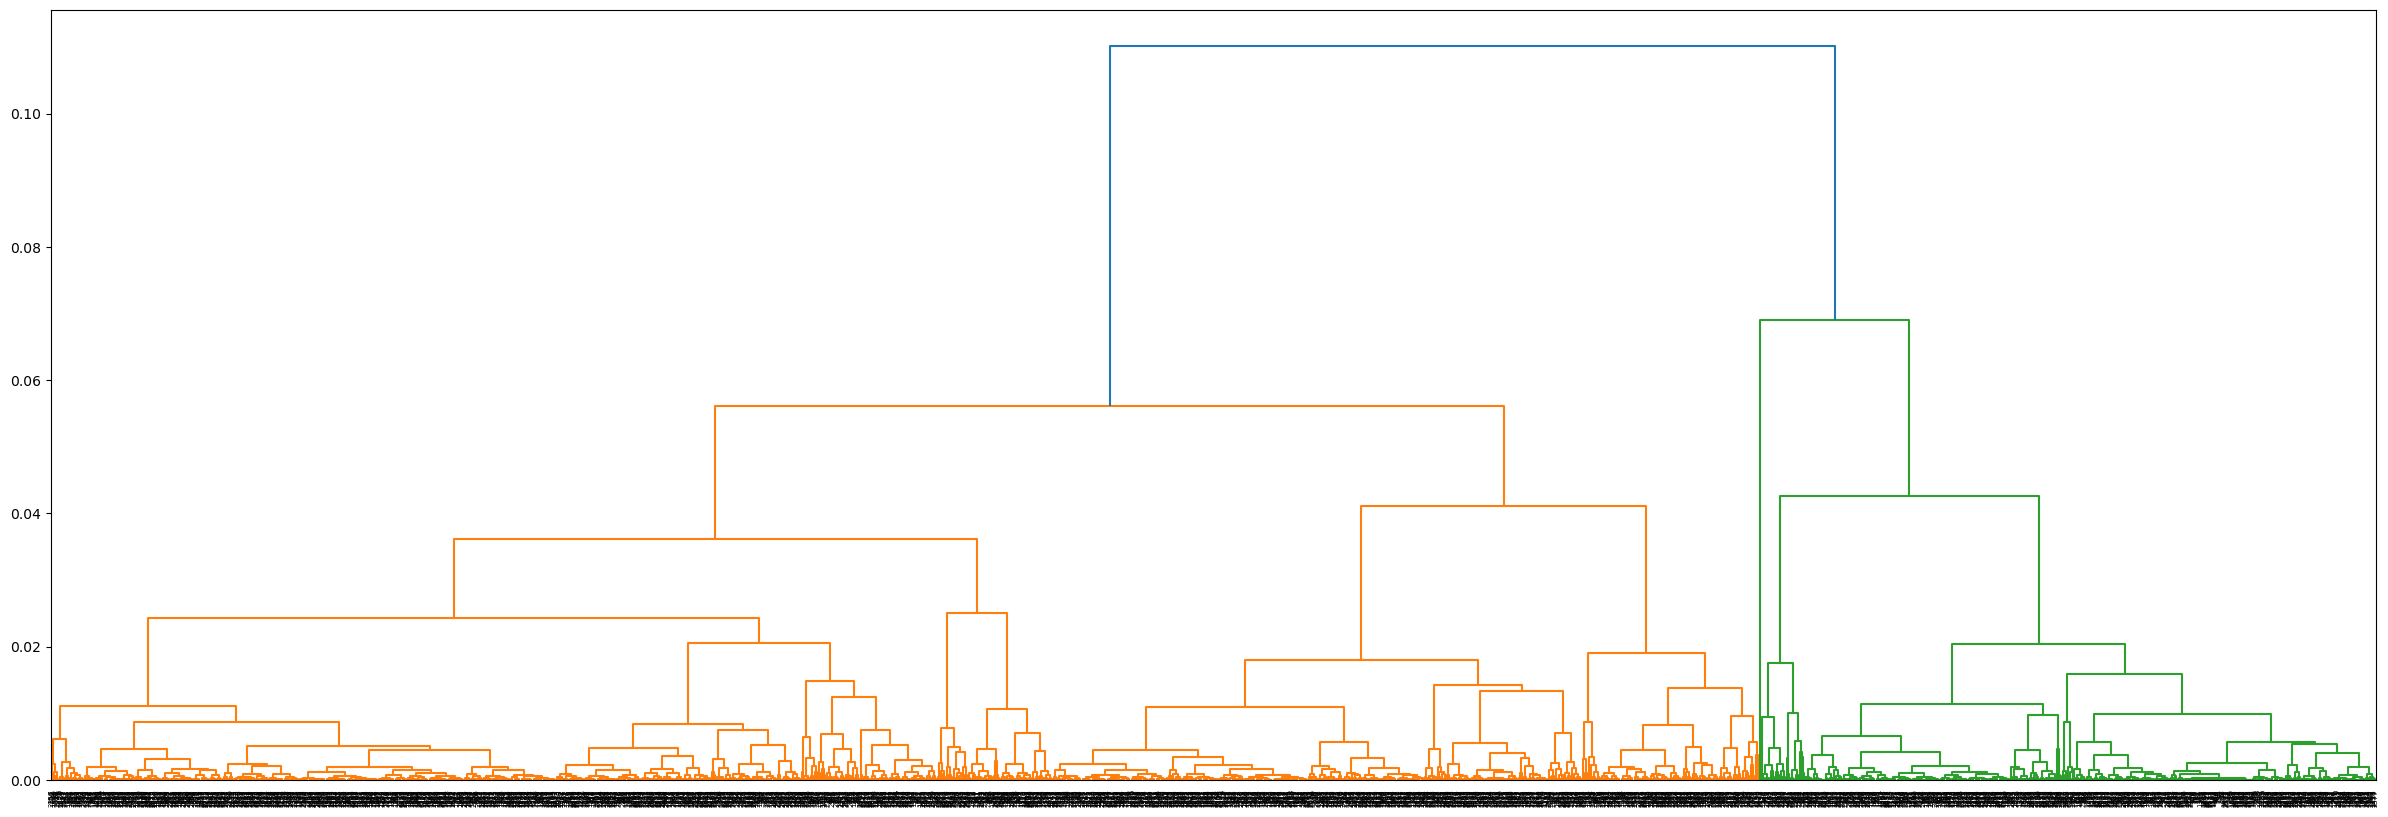

In [9]:
plot_dendrogram(agg)

### nucleotide identity

In [10]:
def calculate_JS_freq_nucl(gene_1, gene_2, genome):
    # calculate H(s1):
    freq_1 = genome[gene_1]['12_symbols']
    freq_2 = genome[gene_2]['12_symbols']
    sigma_HS1 = 0
    sigma_HS2 = 0
    sigma_HS12 = 0
    length_L1L2 = len(genome[gene_1]['sequence'])+len(genome[gene_2]['sequence'])
    # think about the length again for this case
    for pos in range(0,3):
        for nt in ["A", "T", "G", "C"]:
            sigma_HS1 += freq_1[nt][pos]*math.log(freq_1[nt][pos],2)
            sigma_HS2 += freq_2[nt][pos]*math.log(freq_2[nt][pos],2)
            sigma_HS12 += ((((len(genome[gene_1]['sequence'])/length_L1L2)*freq_1[nt][pos])+((len(genome[gene_2]['sequence'])/length_L1L2)*freq_2[nt][pos])))*math.log(((((len(genome[gene_1]['sequence'])/length_L1L2)*freq_1[nt][pos])+((len(genome[gene_2]['sequence'])/length_L1L2)*freq_2[nt][pos]))),2)
        
        
    sigma_HS1= -1 *sigma_HS1
    sigma_HS2= -1 *sigma_HS2
    sigma_HS12 = -1 * sigma_HS12
    JS_div = sigma_HS12 - ((len(genome[gene_1]['sequence'])/length_L1L2)*sigma_HS1) - ((len(genome[gene_2]['sequence'])/length_L1L2)*sigma_HS2)
    # print(sigma_HS1)
    # print(sigma_HS2)
    # print(sigma_HS12)
    # print(JS_div)
    return JS_div

In [11]:
divergences_nucl = np.zeros((len(yakult), len(yakult)))
for x, gene_1 in enumerate(yakult.genes):
    for y, gene_2 in enumerate(yakult.genes):
        divergences_nucl[x,y] = calculate_JS_freq_nucl(gene_1,gene_2,yakult)

In [12]:
divergences_nucl

array([[0.        , 0.01358103, 0.01642988, ..., 0.01958242, 0.02325869,
        0.02223161],
       [0.01358103, 0.        , 0.01386685, ..., 0.02935435, 0.02939565,
        0.01784072],
       [0.01642988, 0.01386685, 0.        , ..., 0.04807196, 0.04365474,
        0.02188182],
       ...,
       [0.01958242, 0.02935435, 0.04807196, ..., 0.        , 0.04528524,
        0.03079786],
       [0.02325869, 0.02939565, 0.04365474, ..., 0.04528524, 0.        ,
        0.02323851],
       [0.02223161, 0.01784072, 0.02188182, ..., 0.03079786, 0.02323851,
        0.        ]])

In [13]:
agg_nucl = AgglomerativeClustering(n_clusters=None,distance_threshold=0, metric='precomputed', linkage='average')

In [14]:
agg_nucl.fit(divergences_nucl)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        metric='precomputed', n_clusters=None)

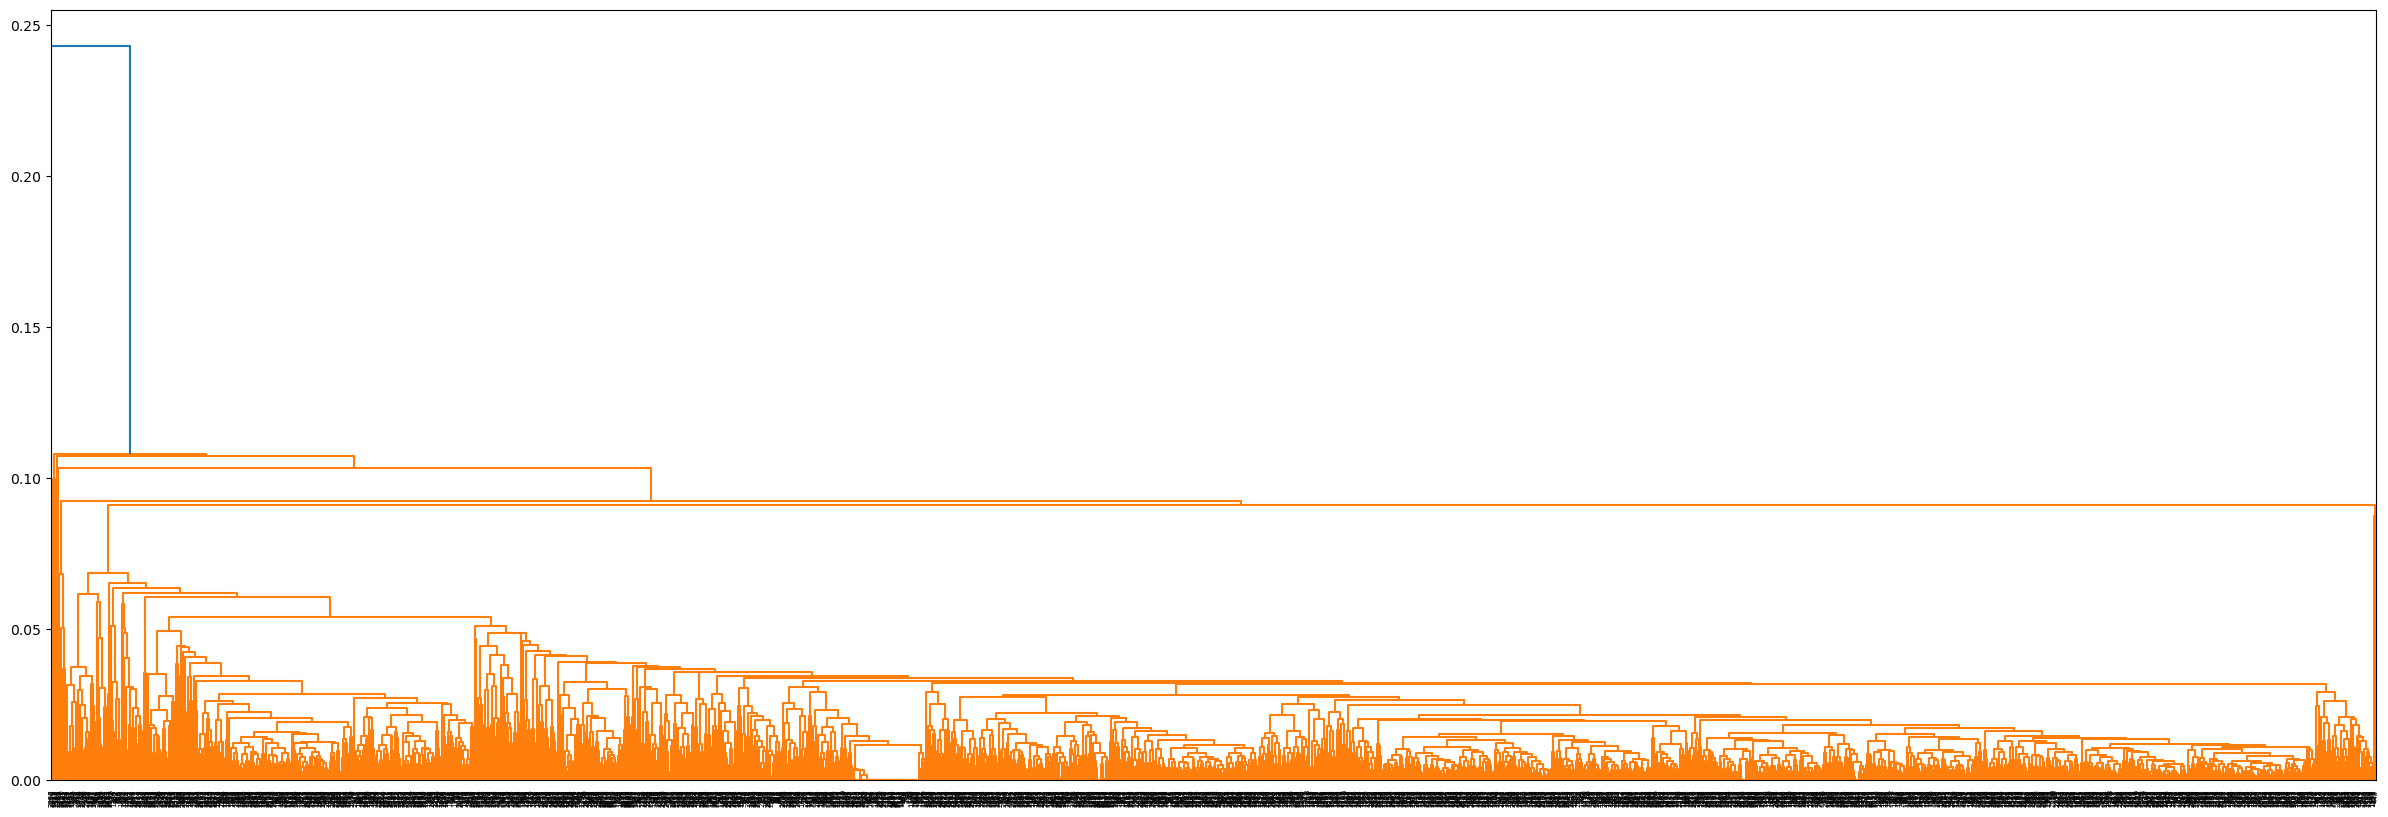

In [15]:
plot_dendrogram(agg_nucl)

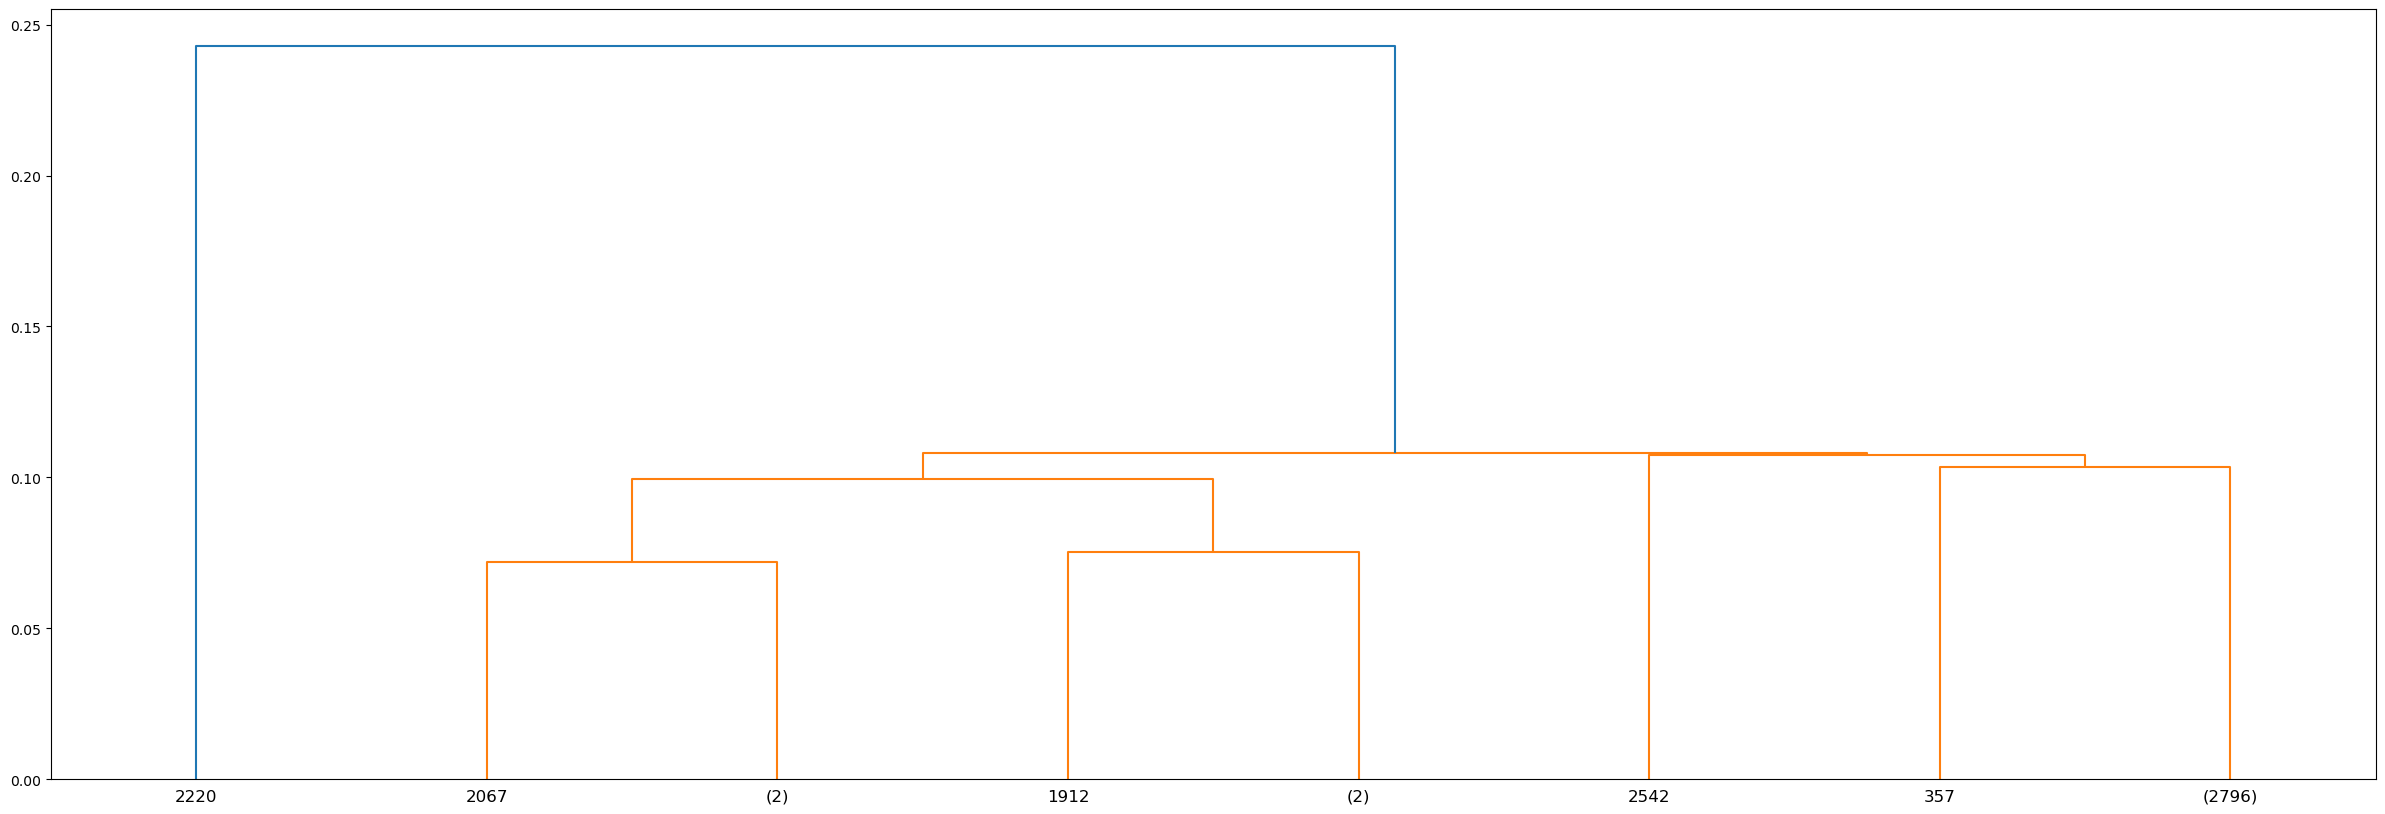

In [16]:
plot_dendrogram(agg_nucl, truncate_mode="level", p=3)

## Attempt to create own's code of agglomeratice clustering 

to replace sklearn (still recreating A and L's)

In [50]:
yakult.genes

{'LBCZ_RS00005': {'gene': 'dnaA',
  'protein': 'chromosomal replication initiator protein DnaA',
  'location': '1..1350',
  'g_count': 332,
  'a_count': 392,
  'c_count': 322,
  't_count': 304,
  'GC1': 56.44444444444444,
  'SD1': 0.3599257649923083,
  'GC2': 32.22222222222222,
  'SD2': -1.1469843157326693,
  'GC3': 56.666666666666664,
  'SD3': 0.7264757587705374,
  'GCT': 48.44444444444444,
  'SDT': 0.11355281569120143,
  'rel_freq': {'G': 0.24592592592592594,
   'A': 0.2903703703703704,
   'C': 0.23851851851851852,
   'T': 0.22518518518518518},
  '12_symbols': {'A': [0.3111111111111111,
    0.3844444444444444,
    0.17555555555555555],
   'T': [0.12444444444444444, 0.29333333333333333, 0.2577777777777778],
   'G': [0.3377777777777778, 0.10666666666666667, 0.29333333333333333],
   'C': [0.22666666666666666, 0.21555555555555556, 0.2733333333333333]},
  '48_symbols': {'AA': [0.13111111111111112,
    0.13111111111111112,
    0.060133630289532294],
   'AG': [0.017777777777777778, 0.08, 0.

In [ ]:
def calculate_JS_freq_nucl_modifierd(genes_1, genes_2, genome):
    # calculate H(s1):
    
    freq_1 = {}
    freq_2 = {}
    length_L1 = 0 
    length_L2 = 0
    
    # calculate freq
    for gene_1 in genes_1:
        freq_1 += genome[gene_1]['12_symbols']
        length_L1 += len(genome[gene_1]['sequence'])
    for gene_2 in genes_2:
        freq_2 += genome[gene_2]['12_symbols']
        length_L2 += len(genome[gene_2]['sequence'])
    freq_1 = freq_1/len(genes_1)
    freq_2 = freq_2/len(genes_2)
    
    # calculate l1 and l2 and l1l2
    
    
    sigma_HS1 = 0
    sigma_HS2 = 0
    sigma_HS12 = 0
    length_L1L2 = length_L1+length_L2
    # think about the length again for this case
    for pos in range(0,3):
        for nt in ["A", "T", "G", "C"]:
            sigma_HS1 += freq_1[nt][pos]*math.log(freq_1[nt][pos],2)
            sigma_HS2 += freq_2[nt][pos]*math.log(freq_2[nt][pos],2)
            sigma_HS12 += ((((length_L1/length_L1L2)*freq_1[nt][pos])+((length_L2/length_L1L2)*freq_2[nt][pos])))*math.log(((((length_L1/length_L1L2)*freq_1[nt][pos])+((length_L2/length_L1L2)*freq_2[nt][pos]))),2)
        
        
    sigma_HS1= -1 *sigma_HS1
    sigma_HS2= -1 *sigma_HS2
    sigma_HS12 = -1 * sigma_HS12
    JS_div = sigma_HS12 - ((len(genome[gene_1]['sequence'])/length_L1L2)*sigma_HS1) - ((len(genome[gene_2]['sequence'])/length_L1L2)*sigma_HS2)
    # print(sigma_HS1)
    # print(sigma_HS2)
    # print(sigma_HS12)
    # print(JS_div)
    return JS_div

In [45]:
dictionary = {}
# init cluster
for x, gene in enumerate(yakult.genes):
    dictionary[x] = [gene]

In [ ]:
# calculate distance matrix
divergences_nucl = np.zeros((len(dictionary), len(dictionary)))
for x, genes_1 in enumerate(dictionary):
    for y, genes_2 in enumerate(dictionary):
        
        divergences_nucl[x,y] = calculate_JS_freq_nucl(genes_1,genes_2,yakult)

In [47]:
# aggregate
dictionary[200]= dictionary[200] + dictionary[500]
dictionary.pop(500)

['LBCZ_RS02505']

In [48]:
# reindex
dictionary = dict(enumerate(v for _, v in sorted(dictionary.items())))

In [49]:
dictionary[500]

['LBCZ_RS02510']

In [20]:
divergences

array([[0.        , 0.00119878, 0.00101084, ..., 0.00281623, 0.00039302,
        0.0024073 ],
       [0.00119878, 0.        , 0.0019752 , ..., 0.00586947, 0.00011213,
        0.00136599],
       [0.00101084, 0.0019752 , 0.        , ..., 0.00994003, 0.0029826 ,
        0.0051125 ],
       ...,
       [0.00281623, 0.00586947, 0.00994003, ..., 0.        , 0.00727319,
        0.00826199],
       [0.00039302, 0.00011213, 0.0029826 , ..., 0.00727319, 0.        ,
        0.00177343],
       [0.0024073 , 0.00136599, 0.0051125 , ..., 0.00826199, 0.00177343,
        0.        ]])

In [21]:
minimum = np.min(divergences[np.nonzero(divergences)])
print(minimum)

2.8043490707396757e-07


In [23]:
masked_a = np.ma.masked_equal(divergences, 0.0, copy=False)
masked_a.min()

2.8043490707396757e-07

In [24]:
np.where(divergences == masked_a.min())

(array([1307]), array([785]))

In [25]:
divergences[1307,785]

2.8043490707396757e-07

## DBSCAN ?

In [134]:
scan = DBSCAN(eps=10**(-3),metric='precomputed',min_samples=200)

In [135]:
scan.fit(divergences)

DBSCAN(eps=0.001, metric='precomputed', min_samples=200)

In [136]:
labels = scan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 379
